# Example 1

La belle au bois dormant

## 4. Automatic dictionary (table and graph)

This method creates a dictionary, using the [TreeTagger](http://www.cis.uni-muenchen.de/~schmid/tools/TreeTagger/) parameters for French.

The tagged forms are used for the alignment.

This method produces three outputs:
- a table and a graph, for which see below here; 
- an external table, where formal and substantive variants are separated.

In [13]:
## REMOVE PUNCTUATION AND UPPER-CASE

import glob, re, os

path = 'data/example1/'  # put the path into a variable 

pathForNewDir = re.sub("1/","1_",path)
os.makedirs(pathForNewDir + 'norm', exist_ok=True)  # create a new folder, if does not exist

files = [os.path.basename(x) for x in glob.glob(path+'*.txt')]  # take all txt files in the directory

for file in files:  # for each file in the directory
    
    ### READ THE FILE CONTENT
    file_opened = open(path+file, 'r', encoding='utf-8') # open the file in mode 'r' (read)
    content = file_opened.read()  # read the file content
    
    ### ALL TO LOWER CASE
    lowerContent = content.lower() 
    
    ### REMOVE PUNCTUATION 
    # replace everything that is not alphanumeric character (\w) or space (\s) with nothing or whitespace, depending on languages
    noPunct_lowerContent = re.sub(r'[^\w\s]',' ',lowerContent) 
    
    ### REMOVE MULTIPLE WHITESPACES
    regularSpaces_noPunct_lowerContent = " ".join(noPunct_lowerContent.split())
    
    ### CREATE A NEW FILE
    filename = file.split('.')[0]
    new_file = open(pathForNewDir+'norm/' + filename + '_norm.txt', 'w', encoding='utf-8') # open the new file in mode 'w' (write)
    
    ### WRITE THE NEW CONTENT INTO THE NEW FILE
    new_file.write(regularSpaces_noPunct_lowerContent) 
    
    ### CLOSE THE FILE
    new_file.close()
    
print('Finished! All normalized!')

Finished! All normalized!


taggedAll and taggedDistinct created in folder Dictionaries/ !


None


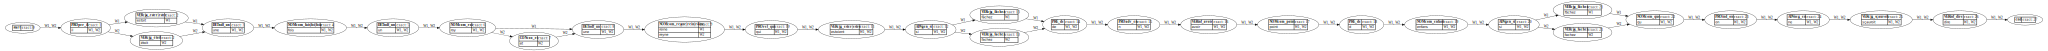

None


In [15]:
from collatex import *
collation = Collation()
import csv, re
from general_functions import tag_poslemma
from general_functions import table_automaticDictionary



tag_poslemma('example1_norm')  # ex: create_poslemma('example1')
print("taggedAll and taggedDistinct created in folder Dictionaries/ !")


W1 = open( "data/example1_norm/W1_norm.txt", encoding='utf-8' ).read()
W2 = open( "data/example1_norm/W2_norm.txt", encoding='utf-8' ).read()

Normit = {}
with open('dictionaries/taggedDistinct_example1_norm.csv') as csvfile:
    reader = csv.DictReader(csvfile, fieldnames=['Original', 'Normalised'])
    for row in reader:
        Normit[row['Original']]= row['Normalised']

#read in the witnesses  from your file system 
from collatex.core_classes import WordPunctuationTokenizer
tokenizer = WordPunctuationTokenizer()

# build a function to tokenize and to normalize by replace keys to be 
# found in the dictionary by the corresponding values 
def tokennormalizer(witness) :
    tokens_as_strings = tokenizer.tokenize(witness)
    list = []
    for token_string in tokens_as_strings:
        normversion = re.sub(r'\s+$',"", token_string)
        replaceversion = Normit.get(normversion,normversion)
        list.append({'t':token_string, 'n':replaceversion})
    return(list)

#collate
tokens_W1 = tokennormalizer(W1) 
tokens_W2 = tokennormalizer(W2) 

witness_W1 = { "id": "W1", "tokens":tokens_W1 }
witness_W2 = { "id": "W2", "tokens":tokens_W2 }


input = { "witnesses": [ witness_W1, witness_W2 ] }

table = collate(input, output='html2', segmentation=False)
print(table)
graphSvg = collate(input, output='svg', segmentation=False)
print(graphSvg)

#graph_automaticDictionary = collate(input, output='json', segmentation=False)
#table_automaticDictionary(graph_automaticDictionary, 'example1')
#print('external table created!')